# Data collection and analysis
**Group 4** \
Adam Zakaria Ababneh \
Kate Paparsenou \
Chris Umbel

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Data Load

In [8]:
df = pd.read_csv('data/ecommerce_customer_data.csv')
df

,CustomerID,RegistrationDate,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,SocialMediaEngagementRate,MobileAppUsage,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,RepeatCustomer,PremiumMember,HasReturnedItems
0,NaN,2020-05-10,25.0,NaN,NaN,Other,Tokyo,4.0,15.886509,NaN,...,0.379694,High,0.0,6.240881,0.112955,0.239948,0.156776,Yes,Yes,No
1,CUST00002,2021-07-18,NaN,Prefer not to say,High,Germany,London,6.0,27.638853,181.725056,...,0.140988,Low,0.0,7.721917,0.300979,0.230821,0.290735,Yes,No,No
2,CUST00003,2021-02-04,43.0,NaN,High,France,NaN,10.0,161.739425,1810.555150,...,0.323660,Low,0.0,7.899042,NaN,0.132239,0.050505,Yes,No,Yes
3,CUST00004,2020-12-31,49.0,Female,High,Australia,Los Angeles,5.0,14.194263,86.219740,...,0.268428,Never,1.0,7.829459,0.074097,0.206644,0.281067,Yes,Yes,No
4,CUST00005,2022-06-27,29.0,Female,Very High,Australia,Tokyo,7.0,31147.427206,2112.575945,...,0.160427,High,NaN,7.777353,0.163438,0.232410,0.326645,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST09996,2018-09-29,39.0,Female,High,Japan,New York,4.0,60.986389,212.992614,...,0.128575,High,1.0,6.094181,0.240422,0.293145,NaN,Yes,Yes,Yes
9996,CUST09997,2020-10-25,58.0,Prefer not to say,Low,France,Sydney,6.0,75.208556,549.352094,...,0.298521,Never,NaN,8.610345,0.056814,0.128591,0.070305,Yes,No,Yes
9997,CUST09998,2023-04-07,14.0,Other,Very High,USA,New York,1.0,37.196899,117.203509,...,0.126018,NaN,0.0,9.864245,0.355694,0.101445,0.161469,No,No,Yes
9998,CUST09999,2021-05-27,29.0,Other,High,Canada,Berlin,3.0,13.191952,-6.655247,...,0.600112,NaN,0.0,6.163032,0.222856,0.160716,0.431023,Yes,No,No


## Conversion
A few fields look like integers, validate that's the case

In [9]:
pd.set_option('display.max_rows', None)
int_columns = ['TotalPurchases', 'CustomerServiceInteractions', 'Age']

In [10]:
list(map(lambda x: print(df.reset_index().groupby([x], dropna = False).count().iloc[:, 1], end='\n\n'), int_columns))

TotalPurchases
0.0      267
1.0      712
2.0     1040
3.0     1211
4.0     1220
5.0     1134
6.0      919
7.0      718
8.0      517
9.0      426
10.0     279
11.0     202
12.0     132
13.0      81
14.0      48
15.0      44
16.0      21
17.0      17
18.0       7
19.0       4
20.0       5
22.0       2
23.0       1
27.0       1
NaN      500
Name: CustomerID, dtype: int64

CustomerServiceInteractions
0.0     1193
1.0     2508
2.0     2413
3.0     1587
4.0      837
5.0      337
6.0       90
7.0       40
8.0        8
9.0        1
11.0       1
NaN      493
Name: CustomerID, dtype: int64

Age
-25.0      2
-21.0      1
-19.0      1
-16.0      0
-15.0      1
-14.0      2
-13.0      2
-12.0      2
-11.0      4
-10.0      2
-9.0       2
-8.0       4
-7.0       5
-6.0       5
-5.0       6
-4.0      10
-3.0       6
-2.0      13
-1.0      17
 0.0      27
 1.0      19
 2.0      21
 3.0      24
 4.0      43
 5.0      39
 6.0      45
 7.0      43
 8.0      50
 9.0      62
 10.0     68
 11.0     74
 12.0

[None, None, None]

Convert the integer fields

In [11]:
df['Age'] = df['Age'].astype('Int64')
df['TotalPurchases'] = df['TotalPurchases'].astype('Int64')
df['CustomerServiceInteractions'] = df['CustomerServiceInteractions'].astype('Int64')

## Column metadata

In [12]:
df.dtypes

CustomerID                      object
RegistrationDate                object
Age                              Int64
Gender                          object
IncomeLevel                     object
Country                         object
City                            object
TotalPurchases                   Int64
AverageOrderValue              float64
CustomerLifetimeValue          float64
FavoriteCategory                object
SecondFavoriteCategory          object
EmailEngagementRate            float64
SocialMediaEngagementRate      float64
MobileAppUsage                  object
CustomerServiceInteractions      Int64
AverageSatisfactionScore       float64
EmailConversionRate            float64
SocialMediaConversionRate      float64
SearchEngineConversionRate     float64
RepeatCustomer                  object
PremiumMember                   object
HasReturnedItems                object
dtype: object

In [13]:
categorical_columns = df.select_dtypes(include = 'object').columns
quantitative_columns = df.select_dtypes(include = ['float64', 'Int64']).columns

### Categorical columns

In [14]:
list(categorical_columns)

['CustomerID',
 'RegistrationDate',
 'Gender',
 'IncomeLevel',
 'Country',
 'City',
 'FavoriteCategory',
 'SecondFavoriteCategory',
 'MobileAppUsage',
 'RepeatCustomer',
 'PremiumMember',
 'HasReturnedItems']

### Quantitative columns

In [15]:
list(quantitative_columns)

['Age',
 'TotalPurchases',
 'AverageOrderValue',
 'CustomerLifetimeValue',
 'EmailEngagementRate',
 'SocialMediaEngagementRate',
 'CustomerServiceInteractions',
 'AverageSatisfactionScore',
 'EmailConversionRate',
 'SocialMediaConversionRate',
 'SearchEngineConversionRate']

## Distribution for categorical fields

In [16]:
pd.set_option('display.max_rows', 20)
list(map(lambda x: print(df.reset_index().groupby([x], dropna = False).count().iloc[:, 0], end='\n\n'), categorical_columns))

CustomerID
CUST00002      1
CUST00003      1
CUST00004      1
CUST00005      1
CUST00007      1
            ... 
CUST09997      1
CUST09998      1
CUST09999      1
CUST10000      1
NaN          492
Name: index, Length: 9509, dtype: int64

RegistrationDate
2018-01-01      2
2018-01-02      5
2018-01-03      5
2018-01-04      2
2018-01-05      2
             ... 
2023-12-27      4
2023-12-28      7
2023-12-29      5
2023-12-30      1
NaN           496
Name: index, Length: 2160, dtype: int64

Gender
F                       1
Female               1846
M                       3
Male                 1830
Other                1901
Prefer not to say    1807
NaN                  2612
Name: index, dtype: int64

IncomeLevel
H               1
High         1792
L               1
Low          1821
Medium       1918
Very High    1964
NaN          2503
Name: index, dtype: int64

Country
Australia    1194
Canada       1169
France       1227
Germany      1149
Japan        1220
Other        1171
UK      

[None, None, None, None, None, None, None, None, None, None, None, None]

## Basic statistics of quantitative fields

In [17]:
df.describe()

,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate
count,9485.0,9470.0,9481.000000,9507.000000,9524.000000,9472.000000,9482.0,9504.000000,9477.000000,9506.000000,9495.000000
mean,34.536742,5.044773,189.224562,672.919948,0.282649,0.286632,2.001793,6.955430,0.198026,0.198721,0.199427
std,15.117146,3.205844,1472.277418,5729.439186,0.157996,0.159938,1.422949,1.894267,0.120243,0.119426,0.120992
min,-25.0,0.0,1.235282,-9331.077011,0.002205,0.002378,0.0,0.000000,0.000885,0.001554,0.002951
25%,24.0,3.0,27.441273,95.662915,0.160170,0.161669,1.0,5.670156,0.106547,0.106324,0.106656
50%,35.0,5.0,54.532801,248.018238,0.260164,0.266130,2.0,7.008513,0.176639,0.178118,0.177495
75%,45.0,7.0,109.260008,545.787253,0.384726,0.389884,3.0,8.365637,0.268938,0.271487,0.273069
max,91.0,27.0,51810.123750,420810.815641,0.890822,0.847513,11.0,10.000000,0.783003,0.824266,0.784076


## Number of NULL columns for quantitative fields

In [18]:
df[quantitative_columns].isna().sum()

Age                            515
TotalPurchases                 530
AverageOrderValue              519
CustomerLifetimeValue          493
EmailEngagementRate            476
SocialMediaEngagementRate      528
CustomerServiceInteractions    518
AverageSatisfactionScore       496
EmailConversionRate            523
SocialMediaConversionRate      494
SearchEngineConversionRate     505
dtype: int64

In [141]:
def draw_boxplot(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = df[column_name].median()
    
    fig, ax = plt.subplots(figsize=(5, 3))
    df[column_name].plot.box(
        ax = ax
    )
    ymin, ymax = ax.get_ylim()

    ax.text(1.25, ymax * 0.7,
            f"Q1: {lower_bound:.02f}",
            va = 'center', ha = 'left', fontsize = 8)
    ax.text(1.25, ymax * 0.8,
        f"Median: {median:.02f}",
        va = 'center', ha = 'left', fontsize = 8)
    ax.text(1.25, ymax * 0.9,
            f"Q3: {upper_bound:.02f}",
            va='center', ha='left', fontsize = 8)
    ax.tick_params(axis='y', labelsize=8)

    if ymax <= 1.0:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:7.2f}"))
    else:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):9d}"))

    plt.show()

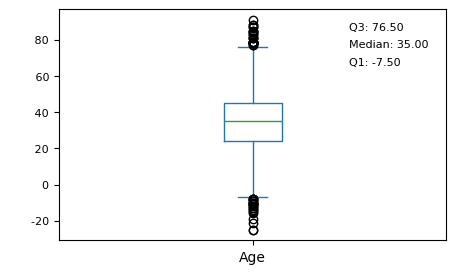

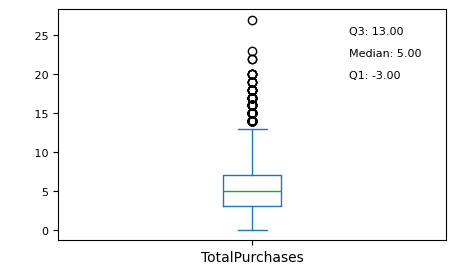

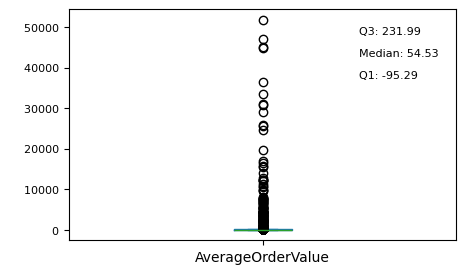

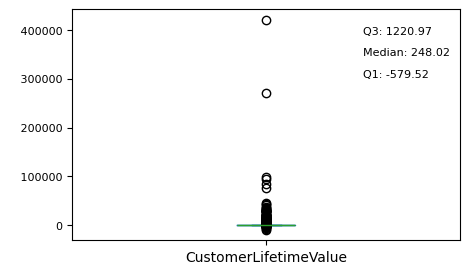

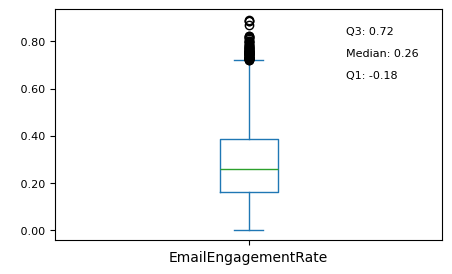

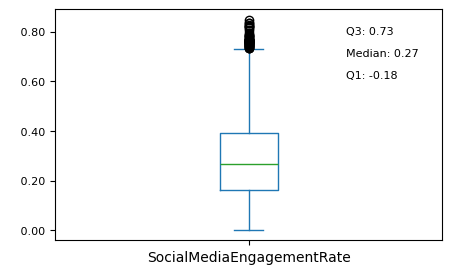

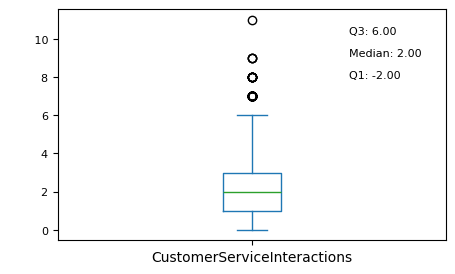

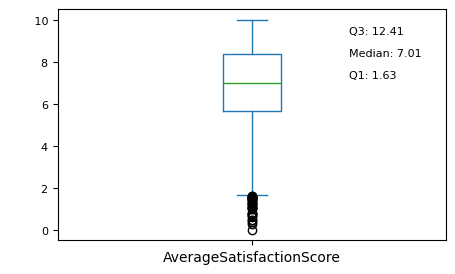

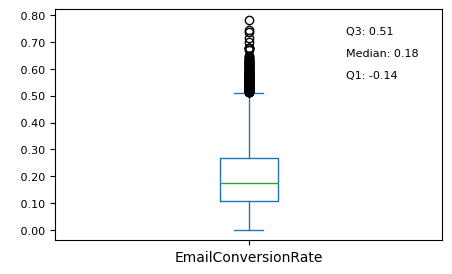

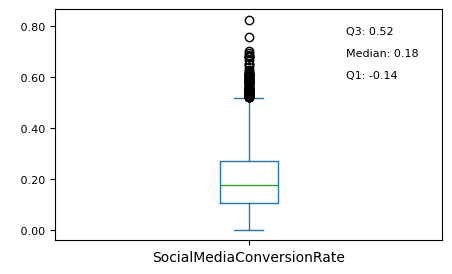

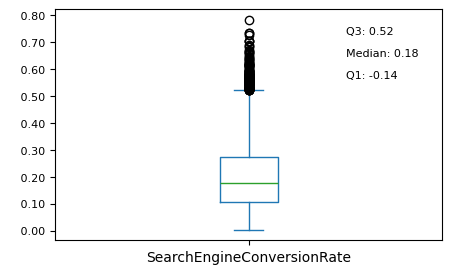

[None, None, None, None, None, None, None, None, None, None, None]

In [142]:
list(map(lambda x: draw_boxplot(df, x), quantitative_columns))